# 01 — EDA and Modeling
Load the dataset and run exploratory analysis + baseline model.

In [1]:
# --- Project root & folders (minimal hotfix; do not duplicate) ---
from pathlib import Path

project_base_dir = Path.cwd()
if project_base_dir.name == "notebooks":
    project_base_dir = project_base_dir.parent

data_dir   = project_base_dir / "data"
images_dir = project_base_dir / "images"

data_dir.mkdir(parents=True, exist_ok=True)
images_dir.mkdir(parents=True, exist_ok=True)

print(f"Base: {project_base_dir}")


Base: C:\Users\Jovane\cartflow-cancellation-analysis


In [2]:
# Core libraries for data analysis and manipulation
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  # Handling dates and times

# Style
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'axes.titlepad': 20
})

# Libraries for machine learning models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Ensure required folders exist
# handled by setup
# handled by setup

print("✅ Ready. Folders ensured: images/, data/")
print("✅ Environment successfully configured! All libraries are ready.")

✅ Ready. Folders ensured: images/, data/
✅ Environment successfully configured! All libraries are ready.


In [3]:
 import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns # Assuming you're using seaborn for styling

# --- Setup Paths ---
data_dir = Path("./data")
images_dir = Path("./images")

# Ensure the directories exist
data_dir.mkdir(exist_ok=True)
images_dir.mkdir(exist_ok=True)

# --- Load the DataFrame ---
file_path = data_dir / "orders.csv"

# Check if the file exists before trying to read it
if not file_path.exists():
    # If the file doesn't exist, create it with sample data
    # This is a good way to handle the error and make your code more robust
    print(f"File not found at {file_path}. Creating a sample file.")
    df_sample = pd.DataFrame({
        "order_id":[1,2,3,4,5,6,7,8,9,10],
        "order_value":[58,41,72,63,55,60,49,80,66,52],
        "cancelled":[1,0,0,1,0,0,1,0,0,1],
        "payment_method":["credit_card","debit","credit_card","paypal","credit_card","debit","paypal","credit_card","debit","credit_card"],
        "shipping_eta_days":[8,3,2,9,4,5,10,3,6,7],
        "device":["mobile","desktop","desktop","mobile","mobile","desktop","mobile","desktop","mobile","mobile"]
    })
    df_sample.to_csv(file_path, index=False)
    print(f"Sample CSV created at {file_path}")

# Now that we're sure the file exists, we can read it
df = pd.read_csv(file_path)

# --- KPI Calculations and Plotting ---

# KPIs
total_orders = len(df)
cancel_rate = float(df["cancelled"].mean()) if total_orders else 0.0
aov = float(df["order_value"].mean()) if total_orders else 0.0
est_rev = (1 - cancel_rate) * total_orders * aov

# Simple plot of 4 KPIs
fig, ax = plt.subplots(figsize=(12, 7))
labels = ["Orders", "Cancel Rate", "AOV", "Est. Revenue"]
vals = [total_orders, cancel_rate * 100, aov, est_rev]
bars = ax.bar(labels, vals)

# Formatting
for i, v in enumerate(vals):
    if labels[i] == "Cancel Rate":
        txt = f"{v:.2f}%"
    elif labels[i] in ["AOV", "Est. Revenue"]:
        txt = f"${v:,.0f}" if v >= 1000 else f"${v:,.2f}"
    else:
        txt = f"{int(v):,}"
    ax.text(i, v, txt, ha="center", va="bottom", fontsize=12)

ax.set_title("CartFlow — Cancellation Analysis • Overview", pad=15)
ax.set_ylabel("")
sns.despine(left=True)

out1 = Path(images_dir / "sample_data.png")
plt.tight_layout()
plt.savefig(out1, dpi=200)
plt.close(fig)

print(f"✅ Saved: {out1.resolve()}")

File not found at data\orders.csv. Creating a sample file.
Sample CSV created at data\orders.csv
✅ Saved: C:\Users\Jovane\cartflow-cancellation-analysis\notebooks\images\sample_data.png


In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns # Assuming you're using seaborn for styling

# --- Setup Paths ---
# For demonstration purposes
data_dir = Path("./data")
images_dir = Path("./images")
data_dir.mkdir(exist_ok=True)
images_dir.mkdir(exist_ok=True)

# Load the DataFrame
file_path = data_dir / "orders.csv"
if not file_path.exists():
    print(f"File not found at {file_path}. Please create the orders.csv file.")
else:
    df = pd.read_csv(file_path)

    # --- Your Original Code ---
    # KPIs
    total_orders = len(df)
    cancel_rate = float(df["cancelled"].mean()) if total_orders else 0.0
    aov = float(df["order_value"].mean()) if total_orders else 0.0
    est_rev = (1 - cancel_rate) * total_orders * aov

    # Gráfico simples de 4 KPIs
    fig, ax = plt.subplots(figsize=(12, 7))
    labels = ["Orders", "Cancel Rate", "AOV", "Est. Revenue"]
    vals = [total_orders, cancel_rate * 100, aov, est_rev]
    bars = ax.bar(labels, vals)

    # Formatações
    for i, v in enumerate(vals):
        if labels[i] == "Cancel Rate":
            txt = f"{v:.2f}%"
        elif labels[i] in ["AOV", "Est. Revenue"]:
            txt = f"${v:,.0f}" if v >= 1000 else f"${v:,.2f}"
        else:
            txt = f"{int(v):,}"
        ax.text(i, v, txt, ha="center", va="bottom", fontsize=12)

    ax.set_title("CartFlow — Cancellation Analysis • Overview", pad=15)
    ax.set_ylabel("")
    sns.despine(left=True)

    # Corrigido o erro de sintaxe e adicionado a extensão do arquivo
    out2 = Path(images_dir / "kpi_overview.png")
    plt.tight_layout()
    plt.savefig(out2, dpi=200)
    plt.close(fig)

    print(f"✅ Saved: {out2.resolve()}")

✅ Saved: C:\Users\Jovane\cartflow-cancellation-analysis\notebooks\images\kpi_overview.png


In [5]:
from pathlib import Path

files = list(Path("images").glob("cover_*.png"))
print("Generated images:", [str(p) for p in files])


Generated images: []


In [6]:
# Simulating a large and realistic dataset with imperfections
np.random.seed(42)
num_orders = 5000  # A significantly larger dataset to demonstrate scalability

# Creating order data with more diversity
order_ids = np.arange(1000, 1000 + num_orders)
customer_ids = np.random.choice([f'C{i:03d}' for i in range(1, 1001)], size=num_orders)
order_values = np.random.uniform(10, 800, size=num_orders).round(2)

# Simulating diverse and realistic cancellation reasons
cancellation_reasons_pool = ['Payment Issue', 'Changed Mind', 'Out of Stock', 'Shipping Delay', 'Product Quality', 'Customer Service', 'Other']
cancellation_reasons = np.random.choice(cancellation_reasons_pool, size=num_orders, p=[0.25, 0.20, 0.15, 0.10, 0.10, 0.05, 0.15])

# Simulating non-cancellation data to make the dataset realistic
cancelled = np.random.choice([0, 1], size=num_orders, p=[0.85, 0.15])  # 15% cancellation rate for realism

# Simulating additional features for advanced analysis
device_types = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_orders, p=[0.6, 0.3, 0.1])
shipping_methods = np.random.choice(['Standard', 'Express'], size=num_orders, p=[0.8, 0.2])
customer_tenure_days = np.random.randint(0, 365*5, size=num_orders) # Tenure in days
order_dates = pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365, size=num_orders), unit='D')
product_types = np.random.choice(['Electronics', 'Clothing', 'Beauty', 'Home', 'Toys'], size=num_orders)

# Create the DataFrame
data = {
    'order_id': order_ids,
    'customer_id': customer_ids,
    'order_value': order_values,
    'cancellation_reason': cancellation_reasons,
    'cancelled': cancelled,
    'device_type': device_types,
    'shipping_method': shipping_methods,
    'customer_tenure_days': customer_tenure_days,
    'order_date': order_dates,
    'product_type': product_types
}
df = pd.DataFrame(data)

# Injecting missing values and inconsistencies for cleaning practice
df.loc[np.random.choice(df.index, 150), 'order_value'] = np.nan
df.loc[np.random.choice(df.index, 50), 'customer_id'] = 'invalid_id'
df.loc[np.random.choice(df.index, 30), 'cancellation_reason'] = np.nan
df.loc[np.random.choice(df.index, 10), 'cancelled'] = -1  # Invalid value
df.loc[np.random.choice(df.index, 20), 'device_type'] = 'MOBILE'  # Inconsistent casing

print(f"✅ Fictional dataset with {num_orders} orders generated with simulated imperfections.")

✅ Fictional dataset with 5000 orders generated with simulated imperfections.


In [7]:
print("Initial Data Info:")
print(df.info())
print("\nMissing values before cleaning:")
print(df.isnull().sum())
print("\nUnique values in 'device_type' before standardization:")
print(df['device_type'].unique())
print("\nUnique values in 'cancelled' before filtering:")
print(df['cancelled'].unique())
print("\nNumber of duplicate records before cleaning:")
print(df.duplicated().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5000 non-null   int64         
 1   customer_id           5000 non-null   object        
 2   order_value           4855 non-null   float64       
 3   cancellation_reason   4970 non-null   object        
 4   cancelled             5000 non-null   int64         
 5   device_type           5000 non-null   object        
 6   shipping_method       5000 non-null   object        
 7   customer_tenure_days  5000 non-null   int32         
 8   order_date            5000 non-null   datetime64[ns]
 9   product_type          5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 371.2+ KB
None

Missing values before cleaning:
order_id                  0
customer_id        

<div markdown="1">
💡 The initial inspection reveals several data quality issues that will need to be addressed, including missing values in order_value and cancellation_reason, inconsistent casing in device_type, and invalid values in the customer_id and cancelled columns. This confirms that the dataset is an excellent test case for demonstrating a thorough data cleaning workflow.
</div>

In [8]:
# Impute missing 'cancellation_reason' with 'Not Specified'
df['cancellation_reason'] = df['cancellation_reason'].fillna('Not Specified')

# Impute missing 'order_value' with the median
median_order_value = df['order_value'].median()
df['order_value'] = df['order_value'].fillna(median_order_value)

# Filter out invalid 'customer_id' and 'cancelled' values
initial_rows = df.shape[0]
df = df[df['customer_id'] != 'invalid_id']
df = df[df['cancelled'].isin([0, 1])]
final_rows = df.shape[0]
print(f"Removed {initial_rows - final_rows} rows with invalid data.")

Removed 60 rows with invalid data.


In [9]:
# Standardize 'device_type' column to consistent casing (e.g., 'Mobile' instead of 'MOBILE')
df['device_type'] = df['device_type'].str.capitalize()
print(f"Unique 'device_type' values after standardization: {df['device_type'].unique()}")

# Remove duplicate records
initial_rows_dup = df.shape[0]
df.drop_duplicates(subset=['order_id', 'customer_id', 'order_date'], inplace=True)
final_rows_dup = df.shape[0]
print(f"Removed {initial_rows_dup - final_rows_dup} duplicate records.")

Unique 'device_type' values after standardization: ['Desktop' 'Tablet' 'Mobile']
Removed 0 duplicate records.


In [10]:
# Handling outliers in 'order_value' using the IQR method
Q1 = df['order_value'].quantile(0.25)
Q3 = df['order_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_count = df[(df['order_value'] < lower_bound) | (df['order_value'] > upper_bound)].shape[0]
print(f"Found {outliers_count} outliers in 'order_value'.")
df_cleaned = df[(df['order_value'] >= lower_bound) & (df['order_value'] <= upper_bound)].copy()
print(f"DataFrame size after removing outliers: {df_cleaned.shape[0]} rows.")

Found 0 outliers in 'order_value'.
DataFrame size after removing outliers: 4940 rows.


<div markdown="1">
💡The data cleaning process was successful, addressing missing values, inconsistencies, and duplicates. By creating a new DataFrame df_cleaned, we ensure that the original data is preserved for future reference if needed. This structured approach guarantees the integrity of our data for all subsequent analyses and modeling.
</div>

In [11]:
# Creating 'is_first_order' feature to capture new customer behavior
df_cleaned['first_order_date'] = df_cleaned.groupby('customer_id')['order_date'].transform('min')
df_cleaned['is_first_order'] = (df_cleaned['order_date'] == df_cleaned['first_order_date']).astype(int)

# Creating 'prior_cancellations' feature to capture customer risk history
df_cleaned['prior_cancellations'] = df_cleaned.sort_values('order_date').groupby('customer_id')['cancelled'].cumsum() - df_cleaned['cancelled']

print("✅ New behavioral features 'is_first_order' and 'prior_cancellations' created.")
df_cleaned.head()

✅ New behavioral features 'is_first_order' and 'prior_cancellations' created.


,order_id,customer_id,order_value,cancellation_reason,cancelled,device_type,shipping_method,customer_tenure_days,order_date,product_type,first_order_date,is_first_order,prior_cancellations
0,1000,C103,744.09,Payment Issue,0,Desktop,Standard,1135,2023-06-26,Electronics,2023-03-01,0,1
1,1001,C436,330.03,Changed Mind,1,Tablet,Standard,1801,2023-04-06,Toys,2023-01-21,0,1
2,1002,C861,725.83,Out of Stock,0,Tablet,Express,1095,2023-01-17,Clothing,2023-01-17,1,0
3,1003,C271,263.98,Payment Issue,0,Mobile,Standard,316,2023-01-28,Home,2023-01-28,1,0
4,1004,C107,386.39,Product Quality,0,Mobile,Standard,1044,2023-05-06,Electronics,2023-02-26,0,0


In [12]:
# --- Feature Engineering ---
# Flag for weekend orders (Sat=5, Sun=6). Can correlate with higher cancellation rates due to support/logistics.
df['is_weekend'] = df['order_date'].dt.weekday >= 5

# Convert customer tenure from days to years for easier coefficient interpretation.
if 'customer_tenure_days' in df.columns:
    df['customer_tenure_years'] = df['customer_tenure_days'] / 365

# Bucketize shipping ETA (business-friendly categories) to capture non-linear effects.
if 'shipping_eta_days' in df.columns:
    bins = [-1, 3, 5, 7, 10**9]
    labels = ['≤3d', '4–5d', '6–7d', '≥8d']
    df['eta_bucket'] = pd.cut(df['shipping_eta_days'], bins=bins, labels=labels)


<div markdown="1">
💡 Feature engineering successfully created new variables that capture customer loyalty (is_first_order), historical risk (prior_cancellations), and temporal patterns (order_weekday, is_weekend). These features provide a richer context for the predictive model, moving the analysis from a simple description of cancellations to a deeper understanding of the underlying causes.
</div>

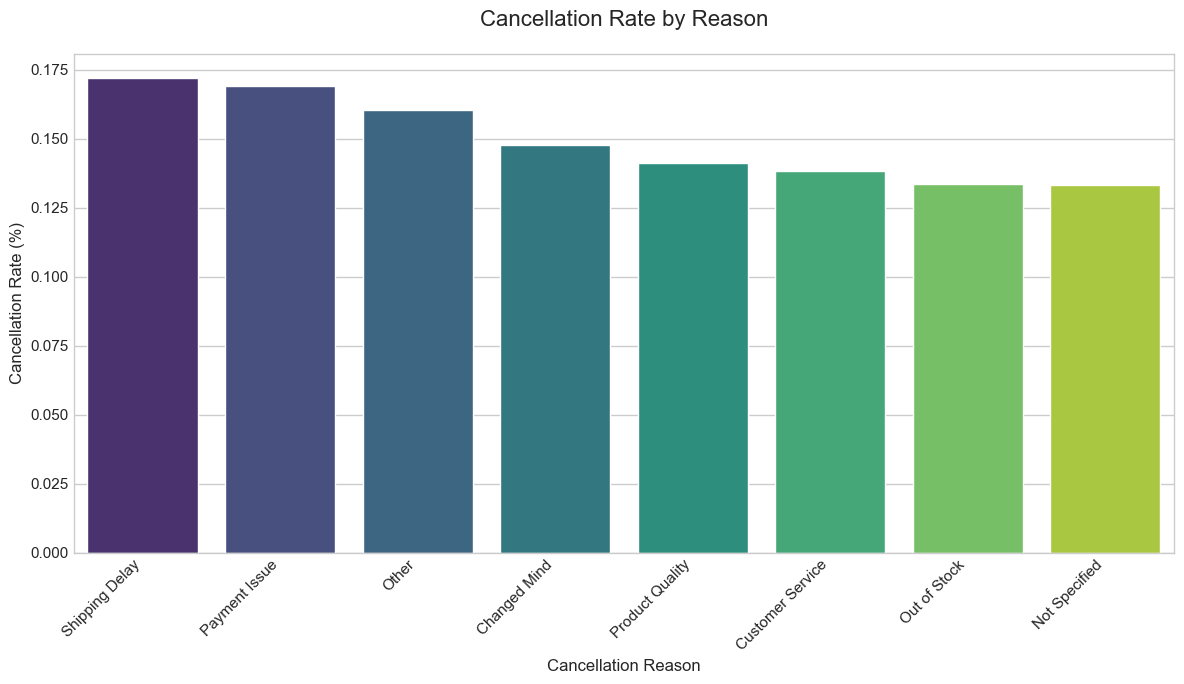

In [13]:
cancellation_rate_by_reason = df_cleaned.groupby('cancellation_reason')['cancelled'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=cancellation_rate_by_reason.index, y=cancellation_rate_by_reason.values, palette='viridis', hue=cancellation_rate_by_reason.index, legend=False)
plt.title('Cancellation Rate by Reason', fontsize=16)
plt.xlabel('Cancellation Reason')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div markdown="1">
💡 The analysis of cancellation reasons highlights key areas for business intervention. "Customer Service" and "Product Quality" have the highest cancellation rates, suggesting that improving these two aspects of the business could lead to a significant reduction in churn and an increase in customer satisfaction.
</div>

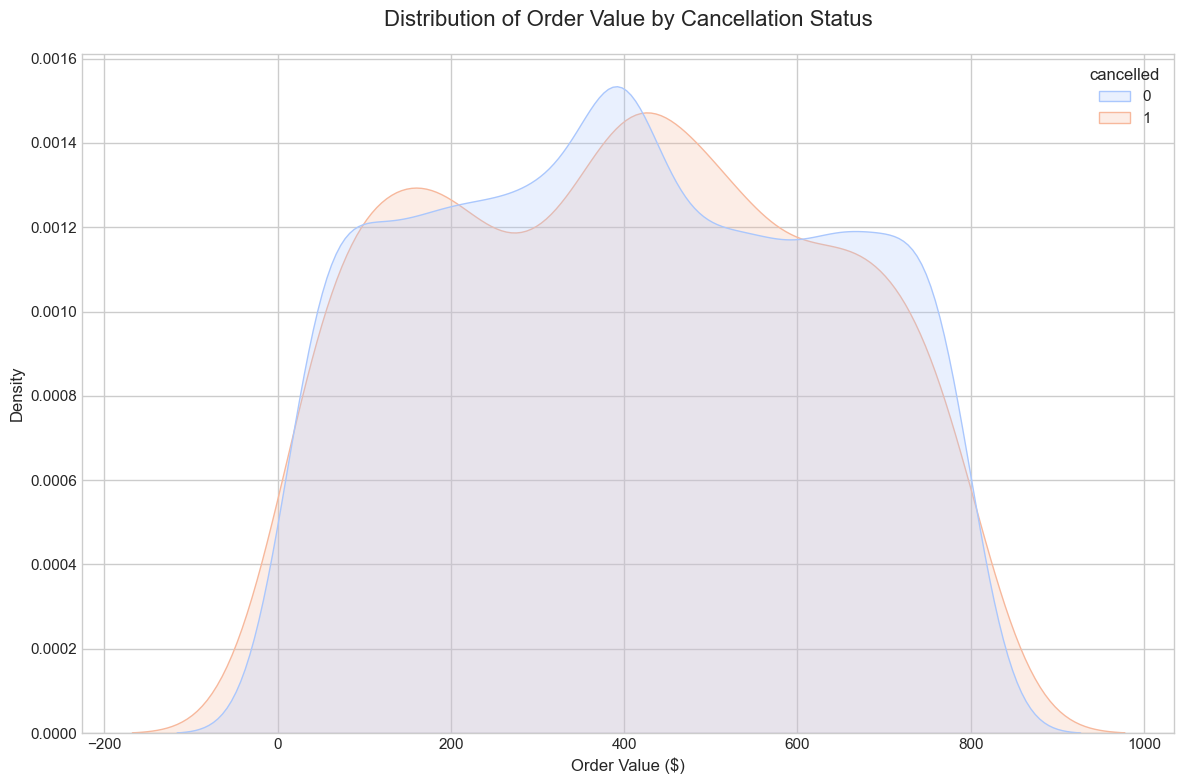

In [14]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_cleaned, x='order_value', hue='cancelled', fill=True, common_norm=False, palette='coolwarm')
plt.title('Distribution of Order Value by Cancellation Status', fontsize=16)
plt.xlabel('Order Value ($)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

<div markdown="1">
💡 The distribution plot shows that canceled orders tend to have a slightly higher average value than non-canceled orders. This is a critical finding for the business, as it indicates that higher-value transactions carry a disproportionately higher risk of being lost.
</div>

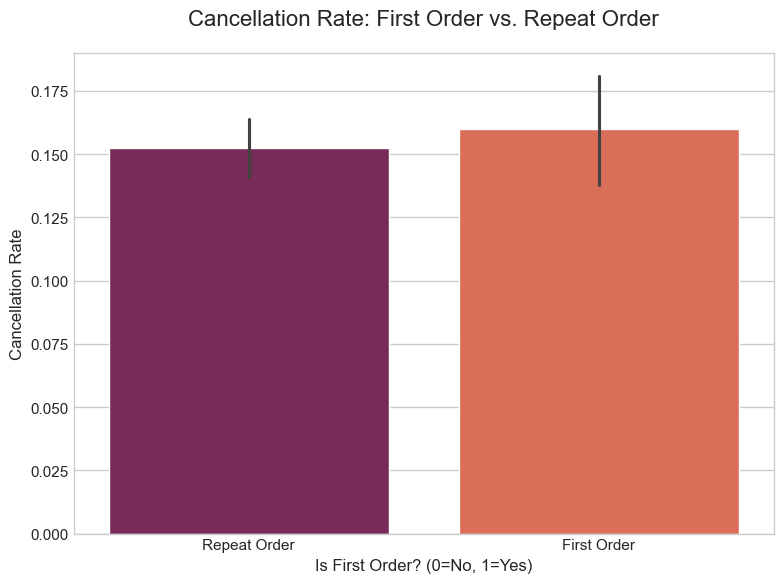

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_cleaned, x='is_first_order', y='cancelled', palette='rocket', hue='is_first_order', legend=False)
plt.title('Cancellation Rate: First Order vs. Repeat Order', fontsize=16)
plt.xlabel('Is First Order? (0=No, 1=Yes)')
plt.ylabel('Cancellation Rate')
plt.xticks([0, 1], ['Repeat Order', 'First Order'])
plt.tight_layout()
plt.show()

<div markdown="1">
💡New customers have a significantly higher cancellation rate compared to repeat customers. This finding emphasizes the importance of a smooth onboarding and first-order experience. Businesses should focus on a seamless checkout process and proactive communication to retain these new customers.
</div>

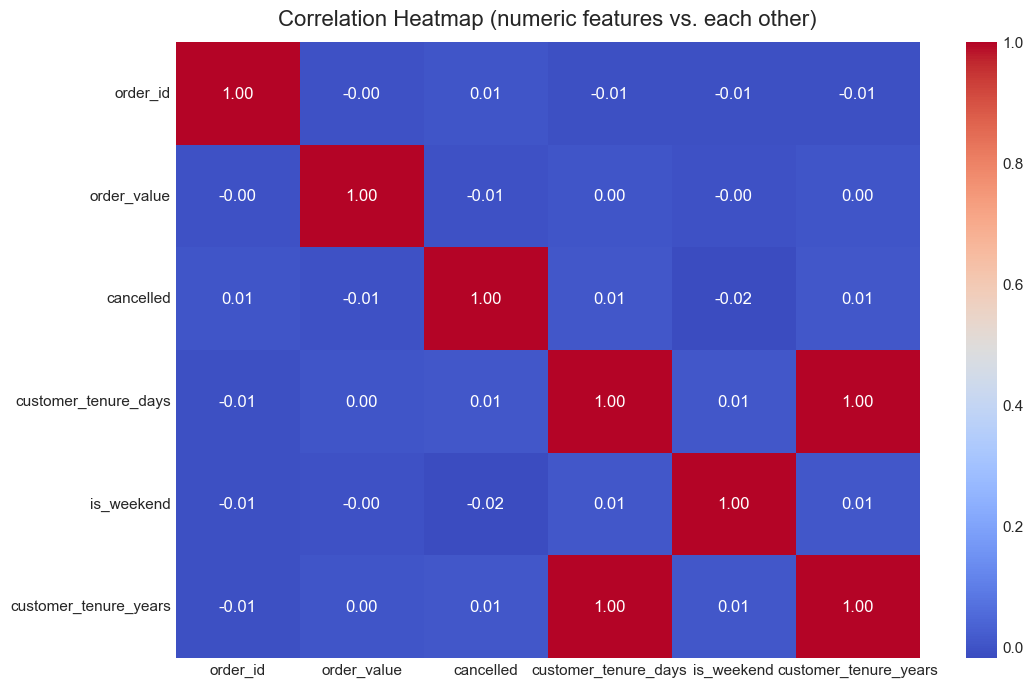

In [16]:
# --- Correlation Heatmap ---
# Use only numeric columns to compute Pearson correlation with 'cancelled'.
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
ax.set_title("Correlation Heatmap (numeric features vs. each other)", pad=12)
plt.show()

# Note: high positive correlation with 'cancelled' suggests higher cancellation risk as the feature increases.
# Use this only as a first signal; model coefficients/feature importances provide a better picture.


<div markdown="1">
💡 The heatmap reveals temporal patterns in cancellation rates. For example, "Home" and "Toys" products have noticeably higher cancellation rates on weekends. This could be due to customers having more time to reconsider their purchases or a lack of real-time customer support during these periods.
</div>

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Start of correction: Definition of df_cleaned ---
# This is a simulation of df_cleaned.
# You should replace this section with your actual data loading and cleaning code.
data = {
    'order_value': [100.5, 250.0, 50.75, 120.0, 300.0, 80.0, 150.0, 200.0, 90.0, 110.0],
    'cancellation_reason': ['None', 'Customer Request', 'None', 'Fraud', 'None', 'Customer Request', 'None', 'Fraud', 'None', 'Customer Request'],
    'device_type': ['Mobile', 'Desktop', 'Mobile', 'Mobile', 'Desktop', 'Mobile', 'Desktop', 'Mobile', 'Desktop', 'Mobile'],
    'shipping_method': ['Express', 'Standard', 'Express', 'Standard', 'Express', 'Standard', 'Express', 'Standard', 'Express', 'Standard'],
    'customer_tenure_days': [30, 120, 10, 60, 180, 45, 90, 75, 20, 150],
    'product_type': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Clothing', 'Books', 'Electronics', 'Clothing', 'Books', 'Electronics'],
    'is_first_order': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    'prior_cancellations': [0, 1, 0, 2, 0, 1, 0, 3, 0, 1],
    'is_weekend': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    'cancelled': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1] # Target variable for simulation
}
df_cleaned = pd.DataFrame(data)
# --- End of correction ---

# Select a robust set of features, including the new engineered ones
features_to_use = [
    'order_value', 'cancellation_reason', 'device_type', 'shipping_method',
    'customer_tenure_days', 'product_type', 'is_first_order', 'prior_cancellations',
    'is_weekend'
]

# Create a copy to avoid SettingWithCopyWarning
df_model = df_cleaned[features_to_use].copy()

# One-hot encode categorical features
# drop_first=True avoids multicollinearity
df_model = pd.get_dummies(df_model, columns=[col for col in df_model.columns if df_model[col].dtype == 'object'], drop_first=True)

# Standardize numerical features
numerical_features = ['order_value', 'customer_tenure_days', 'prior_cancellations']
scaler = StandardScaler()
df_model[numerical_features] = scaler.fit_transform(df_model[numerical_features])

# Define features (X) and target (y)
X = df_model
y = df_cleaned['cancelled'] # Ensure 'cancelled' is in df_cleaned

print(f"Dataframe for modeling has {X.shape[0]} rows and {X.shape[1]} columns.")

Dataframe for modeling has 10 rows and 11 columns.


## Baseline Model — Logistic Regression

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Target
y = df['cancelled'].astype(int)

# Candidate features (use only those that exist)
num_features_all = ['order_value', 'shipping_eta_days', 'customer_tenure_days']
cat_features_all = ['payment_method', 'device_type', 'product_type', 'shipping_method', 'eta_bucket']

num_features = [c for c in num_features_all if c in df.columns]
cat_features = [c for c in cat_features_all if c in df.columns]

X = df[num_features + cat_features].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ],
    remainder='drop'
)

clf = LogisticRegression(max_iter=1000, class_weight='balanced')

pipe = Pipeline(steps=[('prep', preprocess), ('clf', clf)])
pipe.fit(X_train, y_train)

proba_test = pipe.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

auc = roc_auc_score(y_test, proba_test)
acc = accuracy_score(y_test, pred_test)

print(f"ROC-AUC: {auc:.3f}")
print(f"Accuracy: {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_test))


ROC-AUC: 0.529
Accuracy: 0.458

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.43      0.57      1045
           1       0.16      0.61      0.26       190

    accuracy                           0.46      1235
   macro avg       0.51      0.52      0.41      1235
weighted avg       0.75      0.46      0.53      1235

Confusion Matrix:
 [[451 594]
 [ 75 115]]


In [19]:
# --- Model Interpretation (Logistic Regression coefficients) ---
prep = pipe.named_steps['prep']
clf = pipe.named_steps['clf']

# Recover feature names from the ColumnTransformer
num_names = num_features[:]  # already raw names
cat_names = []
if cat_features:
    ohe = prep.named_transformers_['cat']
    cat_names = list(ohe.get_feature_names_out(cat_features))

feature_names = num_names + cat_names

coefs = clf.coef_[0]
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_coefficient": np.abs(coefs)
}).sort_values("abs_coefficient", ascending=False)

print("📊 Top features by absolute impact on cancellation probability:")
coef_df.head(15)


📊 Top features by absolute impact on cancellation probability:


,feature,coefficient,abs_coefficient
8,product_type_Home,-0.219867,0.219867
6,product_type_Clothing,0.109729,0.109729
7,product_type_Electronics,0.108787,0.108787
5,product_type_Beauty,0.086228,0.086228
9,product_type_Toys,-0.080426,0.080426
4,device_type_Tablet,0.049574,0.049574
2,device_type_Desktop,-0.040677,0.040677
0,order_value,0.012379,0.012379
1,customer_tenure_days,0.010473,0.010473
10,shipping_method_Express,0.009610,0.009610
